In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean() , inplace = True)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# extracting numeraical colums 
dfs = df.iloc[: , [1 , 5, 9]]

In [9]:
dfs['Age'] = dfs['Age'].astype(np.int32)

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_16412\3333791847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Age'] = dfs['Age'].astype(np.int32)


In [10]:
dfs

,Survived,Age,Fare
0,0,22,7.2500
1,1,38,71.2833
2,1,26,7.9250
3,1,35,53.1000
4,0,35,8.0500
...,...,...,...
886,0,27,13.0000
887,1,19,30.0000
888,0,29,23.4500
889,1,26,30.0000


In [11]:
x = dfs.iloc[: , 1:]
y = pd.DataFrame(dfs.iloc[:,0] ) 
                

In [12]:
from sklearn.model_selection import train_test_split 
xtrain , xtest , ytrain ,  ytest  = train_test_split (x , y ,test_size = 0.2 , random_state = 2 )

In [13]:
clf =  DecisionTreeClassifier()
clf.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [14]:
ypred = clf.predict(xtest)


In [15]:
lr = LogisticRegression()# making class for linear regresion 
lr.fit(xtrain , ytrain )
ypred_lr = lr.predict(xtest)#predicting liner repgression

D:\software\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print('accuracy score' , accuracy_score(ytest , ypred))
print('cross val score dicision tree ' ,np.mean(cross_val_score (clf ,xtrain , ytrain  , scoring = 'accuracy' , cv = 10)) )

accuracy score 0.6089385474860335
cross val score dicision tree  0.6698161189358373


In [31]:
print("For Logistic Regression ")
print('accuracy score' , accuracy_score(ytest , ypred_lr)
print('cross val score  logistic regression   ' ,np.meancross_val_score (lr ,xtrain , ytrain  , scoring = 'accuracy' , cv = 10)) )

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2895467354.py, line 2)

### Since we fill NaN values with mean values the desity of the mean values is higher 


In [18]:
#the age datasets is almost normally distrubuted so lets apply log transformer 


C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_16412\3370848672.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['Age'] )


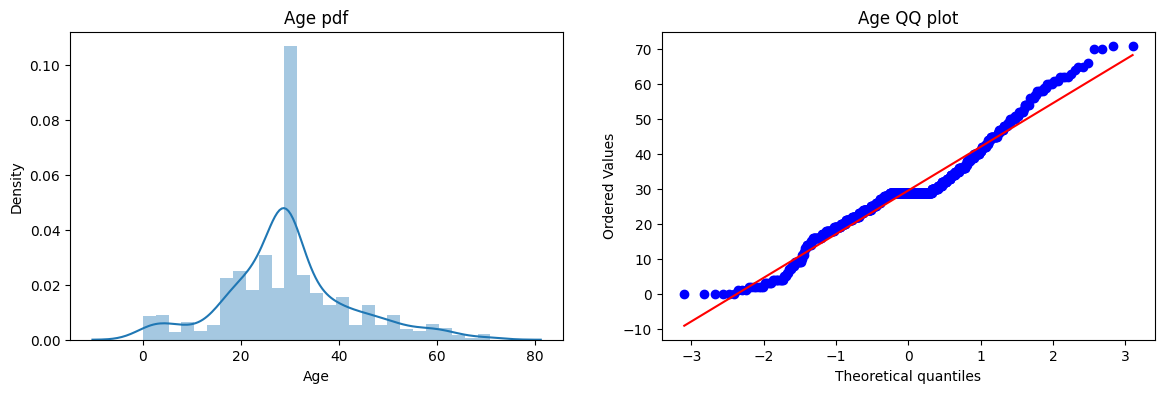

In [19]:
plt.figure(figsize = (14 , 4 )) 
plt.subplot(121) 
sns.distplot(xtrain['Age'] )
plt.title("Age pdf")

plt.subplot(122)
stats.probplot(xtrain['Age'], dist="norm",plot=plt)
plt.title("Age QQ plot")


plt.show()


In [20]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)


In [21]:
xtrain_transform = trf.fit_transform(xtrain['Age'])

See distrubution again 

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_16412\81538854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain_transform)


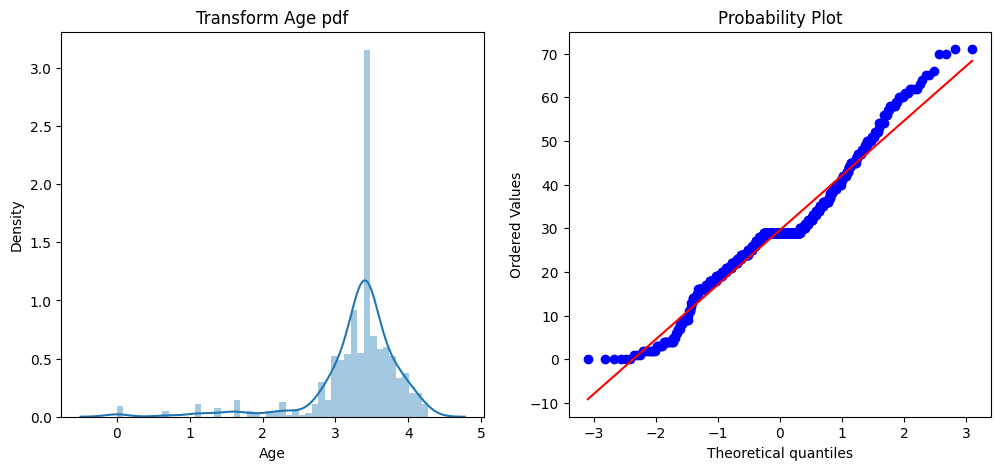

In [22]:
plt.figure(figsize = (12 , 5 ))
plt.subplot(1 , 2 , 1 )
sns.distplot(xtrain_transform)
plt.title("Transform Age pdf") 


plt.subplot(1, 2, 2)
plt.title("")
stats.probplot(xtrain['Age']  , dist = "norm" , plot = plt)
plt.show()

In [23]:
xtrain['Age'].skew() #right pati skwe

0.40154423046753157

In [24]:
xtrain_transform.skew()#left pati gayo 


-2.48969351089039